In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from IPython.core.debugger import set_trace

# Import Packages

In [12]:
from __future__ import print_function
# IMPORT PACKAGES
import warnings
warnings.filterwarnings('ignore')
import os, glob, sys, inspect
import time
from datetime import datetime
import warnings, logging
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from scipy.optimize import minimize
from scipy import optimize
from sklearn.cluster import KMeans
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.mixture import GaussianMixture as GMM
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import itertools as it
from matplotlib.gridspec import GridSpec
from sklearn.mixture import GaussianMixture as GMM
# 
from sklearn.metrics import mean_absolute_error, mean_squared_error
# IMPORT CUSTOM PACKAGES
# curr_dir = os.getcwd()
# parent_dir,_ = os.path.split(curr_dir)
# sys.path.append(parent_dir)
from utils import get_varargin
import utils
# Package config
# Logging config
logger = logging.getLogger()
stream_hdl = logging.StreamHandler(sys.stdout)
file_hdl = logging.FileHandler('logging.log', mode = 'a')
formatter = logging.Formatter('%(asctime)s | %(filename)s - %(levelname)s - %(message)s',
                             datefmt='%Y%m%d-%I:%M')
stream_hdl.setFormatter(formatter)
# stream_hdl.level(logging.INFO)
stream_hdl.setLevel(logging.INFO)
file_hdl.setFormatter(formatter)
file_hdl.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)
logger.addHandler(stream_hdl)
logger.addHandler(file_hdl)
# Only keep one logger
for h in logger.handlers[:-2]: 
    logger.removeHandler(h)

In [13]:
logging.info('testing')

20190925-05:24 | <ipython-input-13-1e1aa23a5774> - INFO - testing


In [3]:
def logging_setup(**kwargs):
    logfile = get_varargin(kwargs, 'logfile', 'logging.log')
    # Logging config
    logger = logging.getLogger()
    stream_hdl = logging.StreamHandler(sys.stdout)
    file_hdl = logging.FileHandler(logfile, mode = 'a')
    formatter = logging.Formatter('%(asctime)s | %(filename)s - %(levelname)s - %(message)s',
                                 datefmt='%Y%m%d-%I:%M')
    stream_hdl.setFormatter(formatter)
    # stream_hdl.level(logging.INFO)
    stream_hdl.setLevel(logging.INFO)
    file_hdl.setFormatter(formatter)
    file_hdl.setLevel(logging.DEBUG)
    logger.setLevel(logging.INFO)
    logger.addHandler(stream_hdl)
    logger.addHandler(file_hdl)
    # Only keep one logger
    for h in logger.handlers[:-2]: 
        logger.removeHandler(h)

In [23]:
logging_setup(logfile = './pose_tracking/logs/logging.log')

In [24]:
logging.info('hello')

20190924-07:38 | <ipython-input-24-3264b3c4841d> - INFO - hello


In [12]:
def dlenv_setup(**kwargs):
    def makedir(inputDir):
        if not os.path.exists(inputDir):
            logging.info('Making directory: {}'.format(inputDir))
            os.makedirs(inputDir)
        else:
            logging.info('Directory already exist')
    
    homeDir = get_varargin(kwargs, 'dir', os.getcwd())
    project_name = get_varargin(kwargs, 'project', 'DL_project')
    projectDir = os.path.join(homeDir, project_name)
    logging.info('Setting up Environment. Project dir: {}'.format(projectDir))
    makedir(projectDir)
    makedir(os.path.join(projectDir, 'dataset'))
    makedir(os.path.join(projectDir, 'models'))
    makedir(os.path.join(projectDir, 'logs'))
    
    
dlenv_setup(project = 'pose_tracking')
    
    

20190924-07:11 | <ipython-input-12-769e7c879da1> - INFO - Setting up Environment. Project dir: C:\Users\pluu\serviceBot\pose_tracking
20190924-07:11 | <ipython-input-12-769e7c879da1> - INFO - Create Directories
20190924-07:11 | <ipython-input-12-769e7c879da1> - INFO - Making directory: C:\Users\pluu\serviceBot\pose_tracking


In [25]:
from config import gen_config

In [26]:
gen_config('dl_config')

In [4]:
import torch
import torchvision.models as pt_models
from torchviz import make_dot
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [5]:
model = pt_models.alexnet()

In [34]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [6]:
plot_model(model)

AttributeError: 'AlexNet' object has no attribute 'layers'

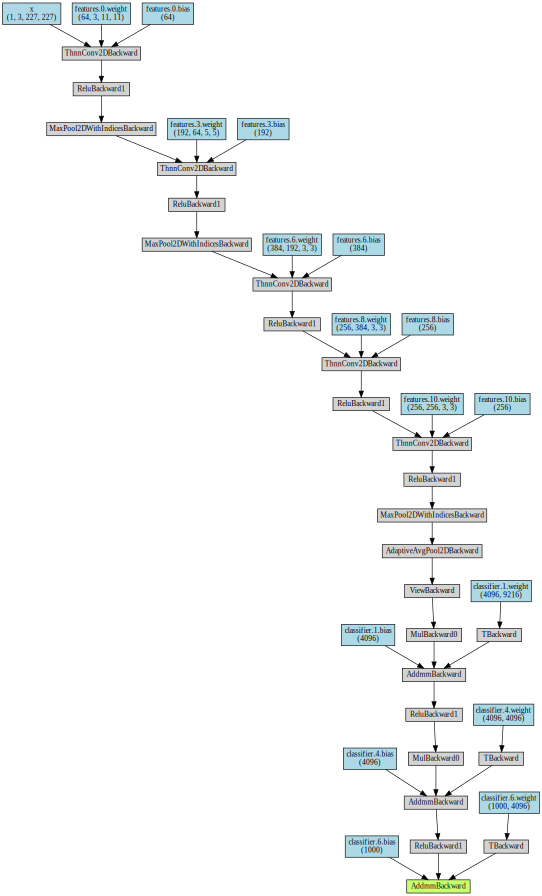

In [7]:
x = torch.randn(1, 3, 227, 227).requires_grad_(True)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))

In [8]:
import config

In [11]:
config.DEBUG

AttributeError: module 'config' has no attribute 'DEBUG'

In [10]:
print(config)

<module 'config' from 'C:\\Users\\pluu\\serviceBot\\config.py'>
